Oulu_NLPTM_TwitterBrexit

In [1]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [2]:
import os
import tweepy as tw
import pandas as pd
import numpy as np

import seaborn as sns
sns.set_style('whitegrid')
import re
import string
from unidecode import unidecode

from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.feature_extraction.text import CountVectorizer


import preprocessor as p
from typing import List
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import tokenize

from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 

from textblob import TextBlob

import sys
sys.path.insert(0, '../config')

from twitter_dev_access import *


# Global Parameters
stop_words = set(stopwords.words('english'))

# amount of tweets collected is tweets_per_page * no_of_pages 
# note that retweets will be directly removed, but are still considered to this number
tweets_per_page = 100 # max 200
no_of_pages = 12

In [3]:
# access twitter
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)


In [4]:
conservatives = ['@BorisJohnson', '@theresa_may']
conservative_house_of_commons = ['@nadams', '@BimAfolami', '@AdamAfriyie', '@imranahmadkhan', '@peter_aldous',
                                 '@lucyallan', '@amessd_southend', '@Stuart4WolvesSW', '@Caroline_Ansell',
                                 '@AthertonNWales', '@GarethBaconMP', '@richardbaconmp', '@KemiBadenoch',
                                 '@ShaunBaileyUK', '@Siobhan_Baillie']
conservatives.extend(conservative_house_of_commons)
labour = ['@HackneyAbbott', '@Debbie_abrahams', '@rushanaraali', '@TahirAliMP', '@DrRosena', '@MikeAmesburyMP',
          '@PutneyFleur', '@ToniaAntoniazzi', '@JonAshworth', '@PaulaBarkerMP', '@ApsanaBegumMP', '@hilarybennmp',
          '@_OliviaBlake', '@PaulBlomfieldMP', '@TracyBrabin', '@BenPBradshaw', '@KevinBrennanMP', '@lynbrownmp']

In [5]:
def collect_tweets(twitterusers):
    tweet_list = []

    for twitter_name in twitterusers:
        print('collecting tweets from ' + twitter_name)
        
        # get tweets for user, exlude retweets and get full tweet content
        pages = tw.Cursor(api.user_timeline, screen_name=twitter_name, include_rts=False, tweet_mode="extended",
                          count=tweets_per_page).pages(no_of_pages)
        
        # get tweets from pages
        tweet_texts = [tweet.full_text for page in pages for tweet in page]

        print('Collected ' + str(len(tweet_texts)) + ' tweets from ' + twitter_name)

        # only add newest 100 tweets to tweet list
        tweet_list.extend(tweet_texts[:1000])
    
    print('All tweets collected for this party: '+ str(len(tweet_list)))
    
    return tweet_list

In [8]:
def tweet_preprocessor(tweets: List[str])->List[str]:
    tweets_cleaned = []
    for tweet in tweets :
        tweets_cleaned.append(p.clean(tweet))
        
    return tweets_cleaned

def listToString(s):  
    str1 = ""  
    
    for ele in s:  
        str1 += ele   
    
    return str1  

In [19]:

def clean(tweet, method='stemming'):
    # adapted from https://www.pluralsight.com/guides/building-a-twitter-sentiment-analysis-in-python
    tweet = tweet.lower()
    
    # Remove unicode characters (emotes etc)
    tweet = unidecode(tweet)
    
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove html encodings like &amp;
    tweet = re.sub(r'&\w+;','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    # use stemmer
    if method=='stemming':
        ps = PorterStemmer()
        stemmed_words = [ps.stem(w) for w in filtered_words]
    
        return " ".join(stemmed_words)
    elif method=='lemmantization':
        lemmantizer = WordNetLemmatizer()
        lemm_words = [lemmantizer.lemmatize(w) for w in filtered_words]
        return " ".join(lemm_words)
    else :
        print('Error ! please provide a correct method')
    

In [10]:

def store(tweet_list, filename):
    with open(filename, 'w') as f:
        for tweet in tweet_list:
            f.write("%s\n" % tweet)
    print(f"saved tweets to {filename}")

In [7]:
conservatives_tweets = collect_tweets(conservatives)

collecting tweets from @BorisJohnson
Collected 872 tweets from @BorisJohnson
collecting tweets from @theresa_may
Collected 681 tweets from @theresa_may
collecting tweets from @nadams
Collected 658 tweets from @nadams
collecting tweets from @BimAfolami
Collected 314 tweets from @BimAfolami
collecting tweets from @AdamAfriyie
Collected 1194 tweets from @AdamAfriyie
collecting tweets from @imranahmadkhan
Collected 381 tweets from @imranahmadkhan
collecting tweets from @peter_aldous
Collected 817 tweets from @peter_aldous
collecting tweets from @lucyallan
Collected 662 tweets from @lucyallan
collecting tweets from @amessd_southend
Collected 982 tweets from @amessd_southend
collecting tweets from @Stuart4WolvesSW
Collected 654 tweets from @Stuart4WolvesSW
collecting tweets from @Caroline_Ansell
Collected 570 tweets from @Caroline_Ansell
collecting tweets from @AthertonNWales
Collected 871 tweets from @AthertonNWales
collecting tweets from @GarethBaconMP
Collected 248 tweets from @GarethBaco

In [26]:
print(conservatives_tweets[:20])

['Great call with my friend @ScottMorrisonMP this morning. Whether it’s boosting trade between great nations or developing cutting-edge technology to tackle climate change - the UK and Australia are partners in building back better from coronavirus.  🇬🇧🇦🇺', 'Fantastic to visit the Royal Berkshire Hospital with @PrueLeith today, taking forward her recommendations to improve food in our hospitals. An important step to improve our long-term health. https://t.co/FqzEt3tuHH', 'Great to see Japan’s commitment to reach #NetZero by 2050. I look forward to working closely with Prime Minister @sugawitter and @JapanGov to tackle climate change in the run up to @COP26 in Glasgow next year 🇬🇧🇯🇵', 'A historic moment as we formally sign the UK-Japan Comprehensive Economic Partnership Agreement, marking a new era of friendship between our nations. 🇬🇧🇯🇵\n\nThis will bring extraordinary opportunities to the UK – boosting jobs and prosperity for businesses and consumers. https://t.co/9e31VWz3ru', 'We wil

In [20]:
cleaned_conservative = [clean(tweet, method='lemmantization') for tweet in conservatives_tweets]

In [97]:
print(cleaned_conservative)

['watch live updat coronaviru 20 octob 2020', 'congratul win second term new zealand pm work togeth tackl climat chang forg excit new trade partnership uk nz great thing look forward futur', 'next week new rapid covid19 test triall across countri enabl us test nh care home staff much frequent', 'watch live updat coronaviru 16 octob 2020', 'updat negoti eu', 'good meet today alway support fantast farmer work tirelessli pandem keep countri fed outsid eu chanc get better fairer deal britain ’ food farm sector', '’ simplifi standardis local rule england introduc three local covid alert level level accompani proportion restrict find local covid alert level area postcod checker', 'watch live updat coronaviru 12 octob 2020', 'real risk lost gener girl never return school let happen global recoveri pandem must leav one behind dayofthegirl urg global action stand everi girl ’ right 12 year qualiti educ', 'today recognis local often unsung hero whose hard work dedic help carri us pandem care com

In [15]:
store(cleaned_conservative, "conservative_tweets_preprocessed.txt")


saved tweets to conservative_tweets_preprocessed.txt


In [6]:
import re
from collections import Counter

#getting top 10 frequent words
def top10(tweets):
    list_of_words = []
    for tweet in tweets:
        words = re.findall(r'\w+', tweet)
        list_of_words.append(words)
    flat_list = [item for sublist in list_of_words for item in sublist]

    word_counts = Counter(flat_list)
    return word_counts.most_common(10)
    

In [18]:
top10_conservative = top10(cleaned_conservative)
print(top10_conservative)

[('today', 1049), ('people', 1000), ('great', 940), ('support', 784), ('get', 730), ('work', 730), ('thank', 702), ('business', 593), ('good', 578), ('year', 562)]


In [8]:
labour_tweets = collect_tweets(labour)

collecting tweets from @HackneyAbbott
Collected 756 tweets from @HackneyAbbott
collecting tweets from @Debbie_abrahams
Collected 655 tweets from @Debbie_abrahams
collecting tweets from @rushanaraali
Collected 259 tweets from @rushanaraali
collecting tweets from @TahirAliMP
Collected 224 tweets from @TahirAliMP
collecting tweets from @DrRosena
Collected 732 tweets from @DrRosena
collecting tweets from @MikeAmesburyMP
Collected 231 tweets from @MikeAmesburyMP
collecting tweets from @PutneyFleur
Collected 726 tweets from @PutneyFleur
collecting tweets from @ToniaAntoniazzi
Collected 504 tweets from @ToniaAntoniazzi
collecting tweets from @JonAshworth
Collected 479 tweets from @JonAshworth
collecting tweets from @PaulaBarkerMP
Collected 400 tweets from @PaulaBarkerMP
collecting tweets from @ApsanaBegumMP
Collected 495 tweets from @ApsanaBegumMP
collecting tweets from @hilarybennmp
Collected 445 tweets from @hilarybennmp
collecting tweets from @_OliviaBlake
Collected 562 tweets from @_Olivi

In [21]:
cleaned_labour = [clean(tweet, 'lemmantization') for tweet in labour_tweets]

In [19]:
top10_labour = top10(cleaned_labour)
print(top10_labour)

[('government', 1009), ('support', 901), ('people', 851), ('need', 726), ('today', 580), ('thanks', 574), ('please', 520), ('must', 497), ('email', 494), ('health', 481)]


In [16]:
store(cleaned_labour, "labour_tweets_preprocessed.txt")


saved tweets to labour_tweets_preprocessed.txt


In [24]:
plot_co_occurence(top10(cleaned_labour).elemens)

AttributeError: 'list' object has no attribute 'elemens'

In [3]:
def load(filename):
    tweet_list = []
    with open(filename, 'r') as f:
        for tweet in f:
            tweet_list.append(tweet.strip())
            
    print(f"loaded tweets from {filename}")
    return tweet_list

In [31]:
conservatives_tweets = load("conservative_tweets_preprocessed.txt")
labour_tweets = load("labour_tweets_preprocessed.txt")

loaded tweets from conservative_tweets_preprocessed.txt
loaded tweets from labour_tweets_preprocessed.txt


In [150]:
top10_conservative_wordset = set([word[0] for word in top10_conservative])
top10_labour_wordset = set([word[0] for word in top10_labour])

jaccard_index_top10 = nltk.jaccard_distance(top10_conservative_wordset, top10_labour_wordset)

print('Jaccard distance based on TOP10 most frequent words: ' + str(jaccard_index_top10))

Jaccard distance based on TOP10 most frequent words: 0.8888888888888888


In [9]:
# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()
    
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
def get_topic_words(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    topic_words = []
    for topic_idx, topic in enumerate(model.components_):
        topic_words.extend([words[i]for i in topic.argsort()[:-n_top_words - 1:-1]])
    return topic_words

labour


R:\Programs\Anaconda\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


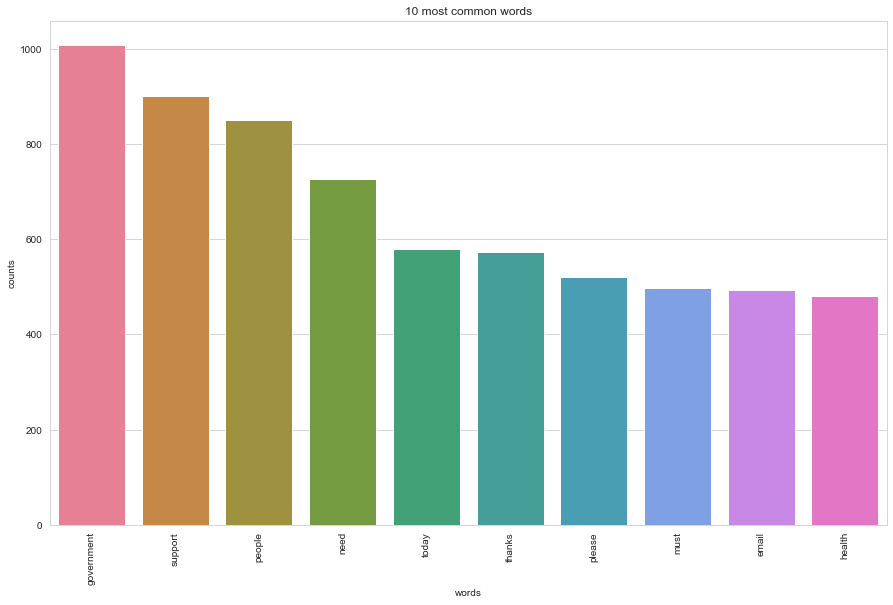

In [31]:
import seaborn as sns
sns.set_style('whitegrid')

# Initialise the count vectorizer with the English stop words
count_vectorizer_conservative = CountVectorizer()
count_vectorizer_labour = CountVectorizer()
# Fit and transform the processed titles
count_data_conservative = count_vectorizer_conservative.fit_transform(cleaned_conservative)

# Fit and transform the processed titles
count_data_labour = count_vectorizer_labour.fit_transform(cleaned_labour)

# Visualise the 10 most common words
#print("conservative")
#plot_10_most_common_words(count_data_conservative, count_vectorizer_conservative)

print("labour")
plot_10_most_common_words(count_data_labour, count_vectorizer_labour)

In [10]:
# Tweak the two parameters below
number_topics = 5
number_words = 10

# Create and fit the LDA model
lda_conservative = LDA(n_components=number_topics, n_jobs=-1)
lda_conservative.fit(count_data_conservative)

# Print the topics found by the LDA model
print("Topics found via LDA for conservative tweets:")
print_topics(lda_conservative, count_vectorizer_conservative, number_words)

# Create and fit the LDA model
lda_labour = LDA(n_components=number_topics, n_jobs=-1)
lda_labour.fit(count_data_labour)

# Print the topics found by the LDA model
print("Topics found via LDA for labour tweets:")
print_topics(lda_labour, count_vectorizer_labour, number_words)

NameError: name 'count_data_conservative' is not defined

In [6]:
from sentistrength import PySentiStr
senti = PySentiStr()
senti.setSentiStrengthPath(os.path.join(os.getcwd(), "SentiStrength.jar"))
senti.setSentiStrengthLanguageFolderPath(os.path.join(os.getcwd(),'SentiStrengthData/'))
# print(os.listdir(os.getcwd()))

# print(type(np.asarray(conservative_tweets)))
corpus1= []
corpus2= []
for tweet in conservatives_tweets:
    corpus1.append(tweet.split())
for tweet in labour_tweets:
    corpus2.append(tweet.split())
corpus1 = [item for sublist in corpus1 for item in sublist]
corpus2 = [item for sublist in corpus2 for item in sublist]
conservatives_sentiments = senti.getSentiment(conservative_tweets, score='dual')
labour_sentiments  = senti.getSentiment(labour_tweets, score='dual')
print(len(conservatives_sentiments))

NameError: name 'conservatives_tweets' is not defined

In [103]:
# print(np.asarray(labour_sentiments[:9000]).shape[1])
positive_negative_array = np.array([])
for col in range(np.asarray(labour_sentiments[:9000]).shape[1]):
    print(np.asarray(labour_sentiments)[:,col])
    
print(np.asarray(labour_sentiments)[:, 0])

[2 2 3 ... 1 2 2]


In [22]:

conservatives_sentiments2 = senti.getSentiment(['historic moment', 'pleased hear discharged hospital get well soon', 'need protect job protect livelihood put uk strongest position economic recovery', 'british government must speak violence brutality currently perpetrated innocent citizen state nigeria'])
labour_sentiments2  = senti.getSentiment(['historic moment', 'pleased hear discharged hospital get well soon', 'fantastic video mark launch stephenlawrenceday must never forget stephen lawrence family struggle justice please follow see family continuing fight systemic racism', 'british government must speak violence brutality currently perpetrated innocent citizen state nigeria'])
print(conservatives_sentiments2)
print(labour_sentiments2)

pearson_score = pearsonr( np.asarray(conservatives_sentiments2), np.asarray(labour_sentiments2))
print(f"positive sentiment value is : {pearson_score}")

[0, 1, 1, -1]
[0, 1, 0, -1]
positive sentiment value is : (0.8528028654224415, 0.14719713457755845)


In [43]:
from scipy.stats import pearsonr

pearson_score = pearsonr( np.asarray(conservatives_sentiments)[0:9000, 0], np.asarray(labour_sentiments)[:, 0])
print(f"positive sentiment value is : {pearson_score}")
pearson_score = pearsonr( np.asarray(conservatives_sentiments)[0:9000, 1], np.asarray(labour_sentiments)[:, 1])
print(f"negative sentiment value is : {pearson_score}")

positive sentiment value is : (0.0023006694492972136, 0.43582204048704626)
negative sentiment value is : (0.0022612487804657597, 0.44372667212709666)


In [11]:
#let's preprocess the the gathered docments again for the parser tree tagging
def clean2(tweet, method='lemmatization'):
    # from https://www.pluralsight.com/guides/building-a-twitter-sentiment-analysis-in-python
    tweet = tweet.lower()
    
    # Remove unicode characters (emotes etc)
    tweet = unidecode(tweet)
    
    # Remove urls
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Remove html encodings like &amp;
    tweet = re.sub(r'&\w+;','', tweet)
    # Remove punctuations
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords
    tweet_tokens = word_tokenize(tweet)
#     filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    # use stemmer
    if method=='stemming':
        ps = PorterStemmer()
        stemmed_words = [ps.stem(w) for w in tweet_tokens]
    
        return " ".join(stemmed_words)
    elif method=='lemmatization':
        lemmantizer = WordNetLemmatizer()
        lemm_words = [lemmantizer.lemmatize(w) for w in tweet_tokens]
        return " ".join(lemm_words)
    else :
        print('Error ! please provide a correct method')
        
cleaned_conservative = [clean2(tweet, method='lemmatization') for tweet in conservatives_tweets]
cleaned_labour = [clean2(tweet, method='lemmatization') for tweet in labour_tweets]


In [48]:
doc1_tokens =[]
doc2_tokens =[]
for tweet in cleaned_conservative:
    doc1_tokens.append(word_tokenize(tweet))
    
for tweet in cleaned_labour:
    doc2_tokens.append(word_tokenize(tweet))
doc1_tokens = [item for sublist in doc1_tokens for item in sublist]
doc2_tokens = [item for sublist in doc2_tokens for item in sublist]
tagged1 = nltk.pos_tag(doc1_tokens)



In [137]:
print([x[1] for x in tagged1[:20]])

['PRP$', 'NN', 'IN', 'DT', 'WP', 'RB', 'VBD', 'PRP$', 'NN', 'IN', 'DT', 'NN', 'NN', 'JJ', 'NN', 'IN', 'PRP$', 'NN', 'DT', 'NN']


In [17]:
p = [tokenize.sent_tokenize(tweet) for tweet in conservatives_tweets]
p = [clean2(tweet, method='lemmatization') for tweet in [item for sublist in p for item in sublist]]
while "" in p:
    p.remove("")
print(p[:100])

['we now have a system of mass testing starting in the great city of liverpool which i believe will help this country defeat this virus', 'dependent on the pilot success we will aim to distribute million of these new rapid test between now and christmas and allow local community to drive down transmission in their area', '33', 'these test will help identify the many thousand of people in the city who dont have symptom but who can still infect others without knowing', '23', 'i want to thank liverpool leader for volunteering to join the uk first citywide population testing pilot and the people of liverpool for taking part', '13', 'i am deeply shocked by the terrible attack in vienna tonight', 'the uk thought are with the people of austria we stand united with you against terror', 'for the next four week i must ask the people of this country to come together to protect the nh and to save life', '10 year on from the historic lancaster house treaty the uk defence and security partnership wi

In [25]:
tagged = nltk.pos_tag(p[10])
print(p[10])

10 year on from the historic lancaster house treaty the uk defence and security partnership with france is stronger than ever


In [27]:
def co_occurent_verbs(corpus, keyword, target="VB")->List[str]:
    cooccurenct_words = []
    for sentence in corpus:
        tokens = word_tokenize(sentence)
        if keyword in tokens:
            #testing if the senteces contains only one verb
            if Counter([x[1] for x in nltk.pos_tag(tokens)]).get(target)==1:
                tagged = nltk.pos_tag(tokens)
                for e in tagged:
                    if e[1]==target:
                        cooccurenct_words.append(e[0])
#                 for token in tokens:
#                     if nltk.pos_tag([token])[0][1]==target:
#                         cooccurenct_words.append(token)
            elif Counter([x[1] for x in nltk.pos_tag(tokens)]).get(target)!=None and target=="VB":
                tagged = nltk.pos_tag(tokens)
                result = closest_verb(tagged, keyword)
                if result !=None:
                    cooccurenct_words.append(result)
    return cooccurenct_words

def closest_verb(tagged, keyword):
    verbs = []
    words = [x[0] for x in tagged]
    index = words.index(keyword)
    for n, i in enumerate(words):
        if i == keyword:
            words[n] = "null"
            
    tags = [x[1] for x in tagged]
    verb_indecies = np.where(np.asarray(tags) == "VB")[0]

    for e in tagged:
        if e[1]=="VB":
            verbs.append(e[0])
    records = []
    for i in verb_indecies:
        records.append((abs(index-i),i))
    verb = words[min(records)[1]]
    if verb != "null":
        return(verb)

    


In [14]:
import matplotlib.pyplot as plt 

def plot_co_occurence(word_frequencies, title="most frequent words"):
    items = sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True)[:15]
    words = [w[0] for w in items]
    counts = [w[1] for w in items]
    x_pos = np.arange(len(words)) 

    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title=title)
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

Counter({'get': 105, 'be': 19, 'deliver': 17, 'see': 6, 'support': 5, 'stop': 5, 'take': 3, 'move': 3, 'block': 3, 'ensure': 3, 'bring': 2, 'make': 2, 'join': 2, 'hear': 2, 'mean': 2, 'remain': 2, 'i': 2, 'lead': 2, 'back': 2, 'tell': 1, 'pas': 1, 'show': 1, 'end': 1, 'leave': 1, 'explain': 1, 'improve': 1, 'build': 1, 's': 1, 'put': 1, 'agree': 1, 'cause': 1, 'change': 1, 'fight': 1, 'use': 1, 'go': 1, 'undermine': 1, 'discus': 1, 'outpace': 1, 'prepare': 1, 'work': 1, 'usher': 1, 'find': 1, 'contradict': 1, 'review': 1, 'recognise': 1, 'stick': 1, 'guide': 1, 'brexit': 1, 'tie': 1, 'promote': 1, 'have': 1, 'reengage': 1, 'look': 1, 'revisit': 1, 'email': 1, 'focus': 1, 'reaffirm': 1, 'celebrate': 1, 'tackle': 1, 'turn': 1, 'secure': 1, 'vote': 1, 'become': 1, 'cost': 1, 'frustrate': 1, 'guarantee': 1, 'do': 1})


R:\Programs\Anaconda\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


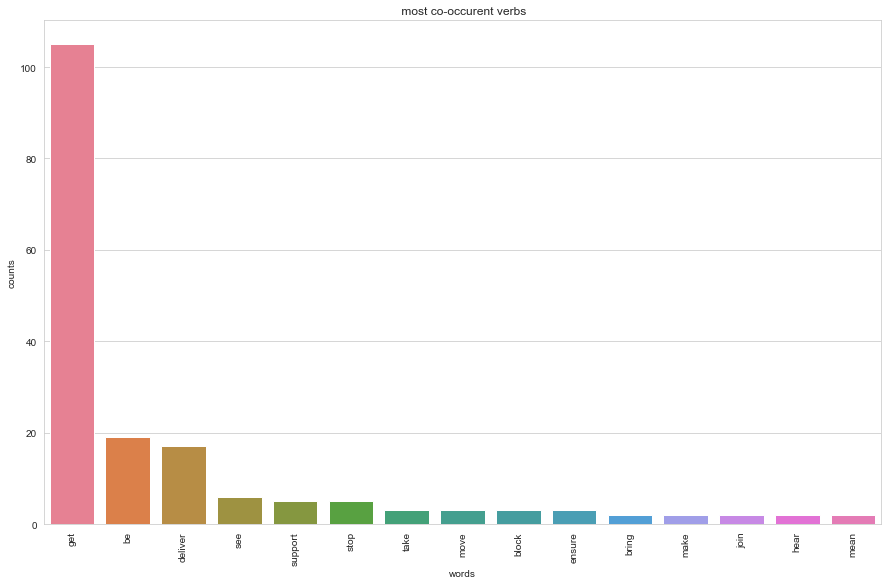

In [15]:
result = Counter(co_occurent_verbs(p, "brexit"))     
print(result)
plot_co_occurence(result, " most co-occurent verbs")

Counter({'conservative': 25, 'british': 10, 'second': 9, 'unleash': 8, 'only': 5, 'brexit': 4, 'nh': 4, 'right': 4, 'whole': 3, 'let': 3, 'clear': 2, 'parliament': 2, 'new': 2, 'uk': 2, 'national': 2, 'good': 2, 'i': 2, 'prime': 2, 'local': 2, 'unite': 2, 'few': 2, 'common': 2, 'hard': 1, 'incredible': 1, 'unfit': 1, 'australian': 1, 'corbyn': 1, 'brighter': 1, 'labour': 1, 'united': 1, 'great': 1, 'white': 1, 'daylong': 1, 'failed': 1, 'financial': 1, 'happy': 1, 'undecided': 1, 'main': 1, 'bad': 1, 'oct': 1, 'further': 1, 'subject': 1, 'tpds': 1, 'pleased': 1, 'last': 1, 'informative': 1, 'sensible': 1, 'contradictory': 1, 'eu': 1, 'toxic': 1, 'thought': 1, 'december': 1, 'future': 1, 'ready': 1, 'precious': 1, 'general': 1, 'simple': 1})


R:\Programs\Anaconda\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


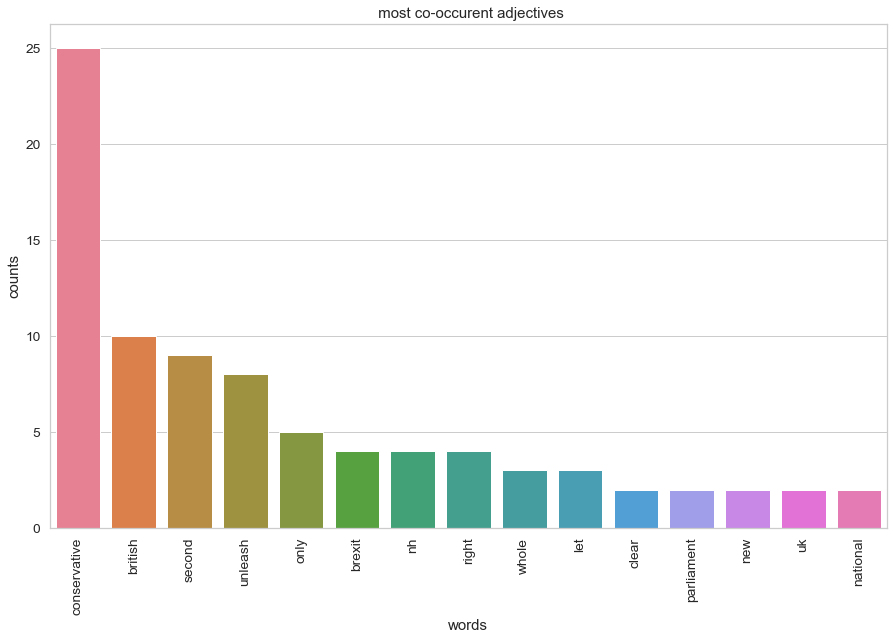

In [29]:
result = Counter(co_occurent_verbs(p, "brexit", "JJ"))     
print(result)
plot_co_occurence(result, " most co-occurent adjectives")

Counter({'back': 14, 'so': 12, 'forward': 7, 'together': 5, 'just': 5, 'now': 5, 'only': 4, 'not': 4, 'here': 3, 'finally': 2, 'actually': 2, 'soon': 2, 'rather': 2, 'still': 2, 'really': 2, 'always': 2, 'ago': 1, 'pm': 1, 'again': 1, 'i': 1, 'invest': 1, 'well': 1, 'tougher': 1, 'sincerely': 1, 'ahead': 1, 'right': 1, 'also': 1, 'selfevidently': 1, 'understandably': 1, 'poorly': 1, 'very': 1, 'exactly': 1, 'too': 1, 'once': 1, 'totally': 1, 'far': 1, 'matter': 1, 'there': 1, 'regardless': 1, 'properly': 1, 'first': 1, 'literally': 1})


R:\Programs\Anaconda\envs\tensor\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


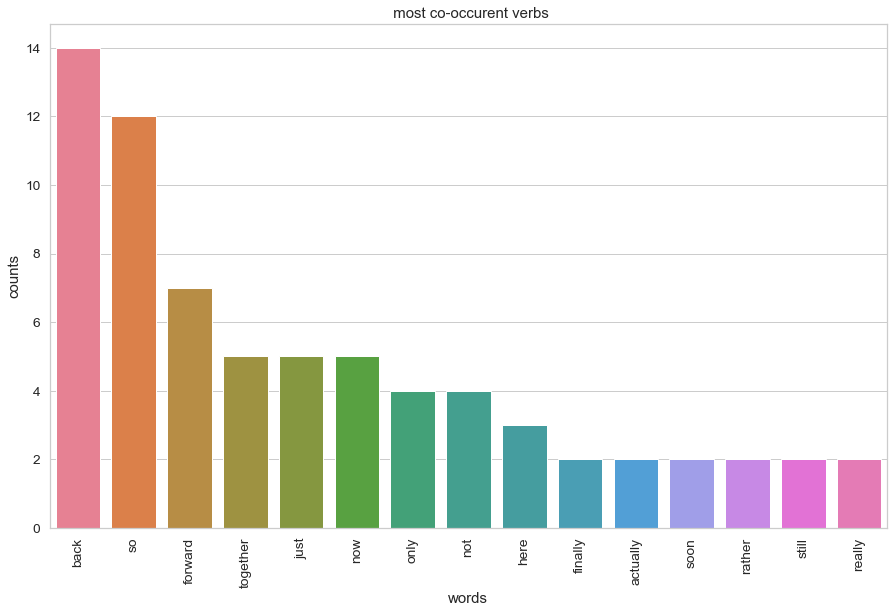

In [28]:
result = Counter(co_occurent_verbs(p, "brexit", "RB"))     
print(result)
plot_co_occurence(result, " most co-occurent verbs")

In [ ]:
def get_sentiment(all_tweets : List[str])->List[float]:
    sentiment_scores = []
    for tweet in all_tweets:
        blob = TextBlob(tweet)
        sentiment_score.append(blob.sentiment.polarity)
    return sentiment_scores